<a href="https://colab.research.google.com/github/layann444/game-analytics-project/blob/main/AnalysInformationGame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd

# إنشاء بيانات وهمية لـ 9 لاعبين
data = {
    'Player': ['Player 1', 'Player 2', 'Player 3', 'Player 4', 'Player 5',
               'Player 6', 'Player 7', 'Player 8', 'Player 9'],
    'Moves': [20, 15, 25, 18, 22, 30, 19, 17, 23],
    'Mistakes': [5, 2, 7, 3, 6, 8, 4, 1, 5],
    'Time': [150, 120, 180, 130, 160, 200, 140, 110, 170]
}

# تحويل البيانات إلى DataFrame
df = pd.DataFrame(data)

# عرض البيانات
df


,Player,Moves,Mistakes,Time
0,Player 1,20,5,150
1,Player 2,15,2,120
2,Player 3,25,7,180
3,Player 4,18,3,130
4,Player 5,22,6,160
5,Player 6,30,8,200
6,Player 7,19,4,140
7,Player 8,17,1,110
8,Player 9,23,5,170


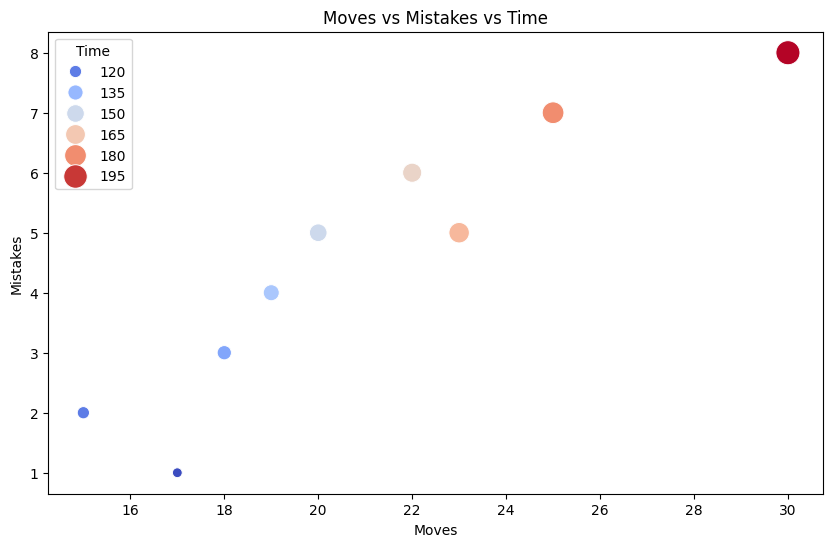

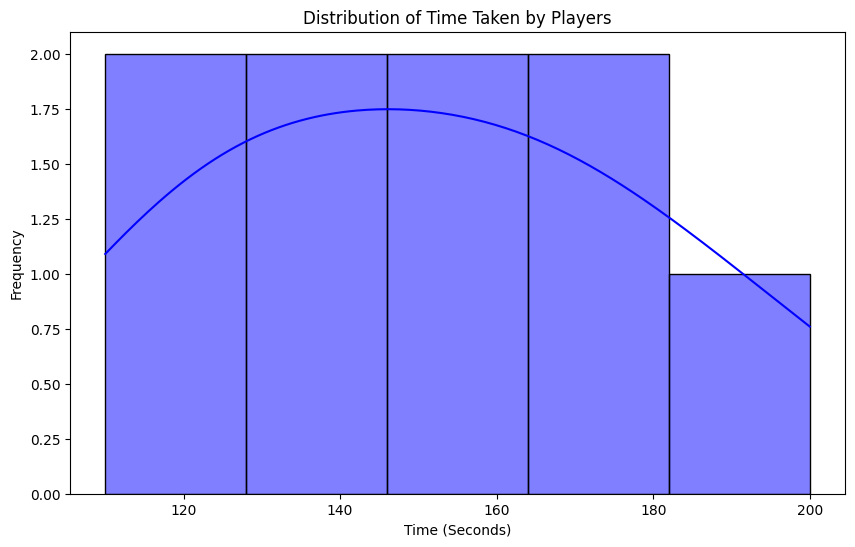

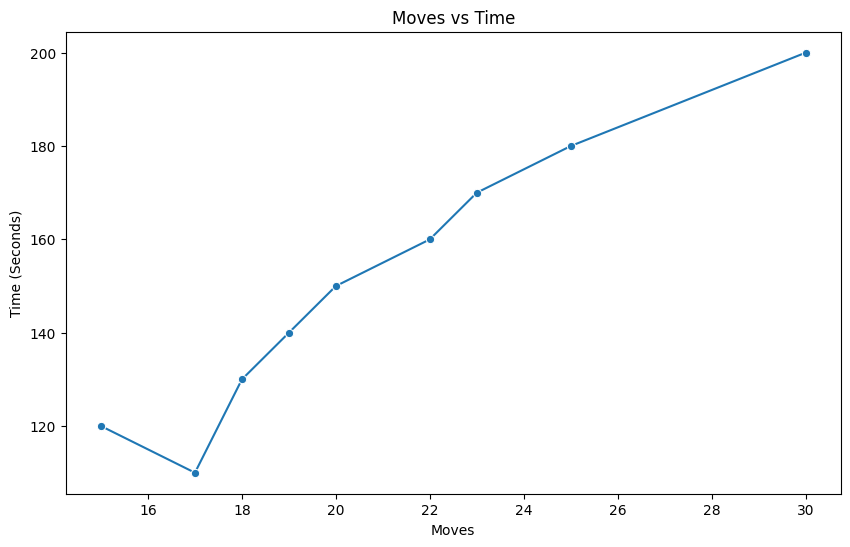

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# رسم بياني يوضح العلاقة بين الحركات والأخطاء
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Moves", y="Mistakes", hue="Time", palette="coolwarm", size="Time", sizes=(50, 300))
plt.title("Moves vs Mistakes vs Time")
plt.xlabel("Moves")
plt.ylabel("Mistakes")
plt.show()

# رسم بياني آخر يوضح توزيع الوقت المستغرق في اللعبة
plt.figure(figsize=(10, 6))
sns.histplot(df['Time'], kde=True, color='blue')
plt.title("Distribution of Time Taken by Players")
plt.xlabel("Time (Seconds)")
plt.ylabel("Frequency")
plt.show()

# رسم بياني يوضح العلاقة بين الحركات والوقت المستغرق
plt.figure(figsize=(10, 6))
sns.lineplot(x="Moves", y="Time", data=df, marker="o")
plt.title("Moves vs Time")
plt.xlabel("Moves")
plt.ylabel("Time (Seconds)")
plt.show()



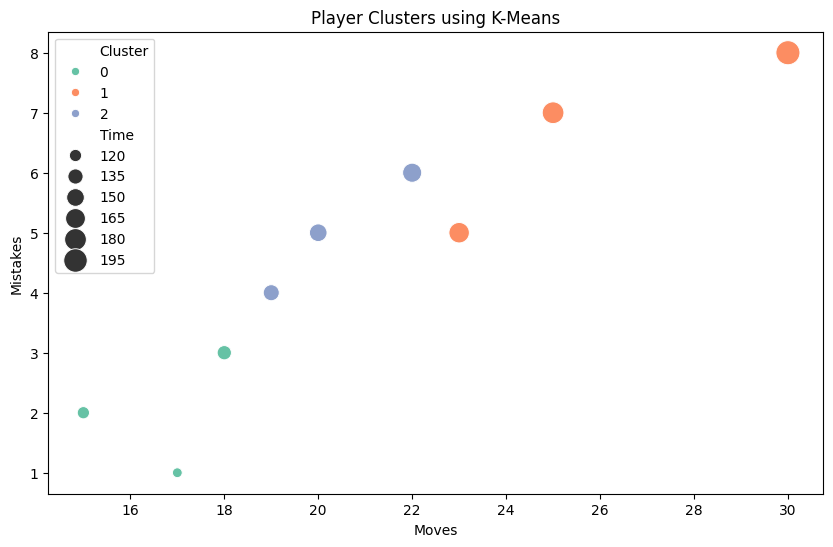

In [15]:
from sklearn.cluster import KMeans

# تطبيق K-Means لتجميع اللاعبين بناءً على الحركات والأخطاء والوقت
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Moves', 'Mistakes', 'Time']])

# عرض التجميعات باستخدام Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Moves", y="Mistakes", hue="Cluster", palette="Set2", size="Time", sizes=(50, 300))
plt.title("Player Clusters using K-Means")
plt.xlabel("Moves")
plt.ylabel("Mistakes")
plt.show()



Model Accuracy: 100.00%


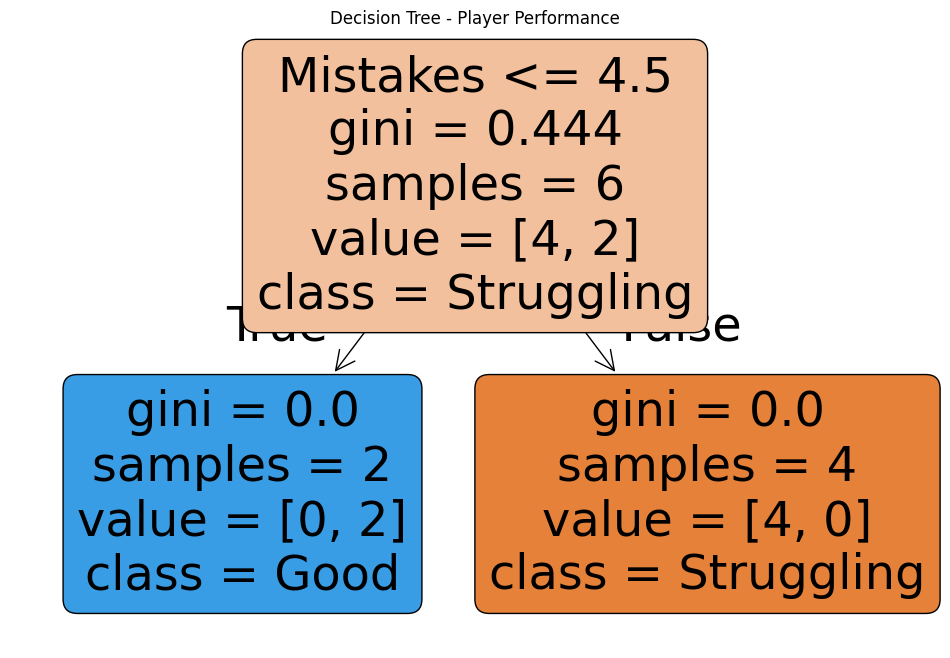

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# الهدف: تصنيف اللاعبين إلى "جيد" أو "يواجه صعوبة"
df['Label'] = (df['Mistakes'] < 5).astype(int)

# الميزات (Features): Moves, Mistakes, Time
X = df[['Moves', 'Mistakes', 'Time']]
y = df['Label']

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# تدريب نموذج Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# التنبؤ باستخدام البيانات الاختبارية
y_pred = model.predict(X_test)

# حساب الدقة
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# عرض شجرة القرار
plt.figure(figsize=(12, 8))
from sklearn.tree import plot_tree
plot_tree(model, filled=True, feature_names=['Moves', 'Mistakes', 'Time'], class_names=['Struggling', 'Good'], rounded=True)
plt.title("Decision Tree - Player Performance")
plt.show()


In [17]:
def generate_recommendations(cluster):
    if cluster == 0:
        return "Consider adding hints for players in this cluster."
    elif cluster == 1:
        return "Players in this cluster are struggling; reduce the difficulty."
    else:
        return "Keep the current game design, players in this cluster are performing well."

# مثال لاستخدام الدالة مع اللاعب الأول
print(generate_recommendations(df['Cluster'][0]))


Keep the current game design, players in this cluster are performing well.


In [18]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


In [19]:
pip install streamlit


2025-05-21 19:59:25.726 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 19:59:25.850 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-21 19:59:25.851 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 19:59:25.853 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 19:59:25.855 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 19:59:25.903 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 19:59:25.905 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 19:59:25.906 Thread 'MainThread': mi

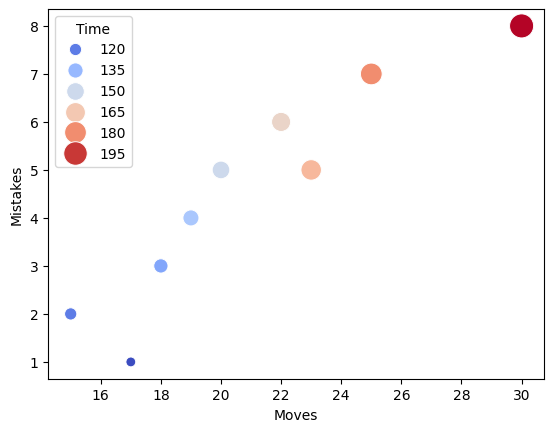

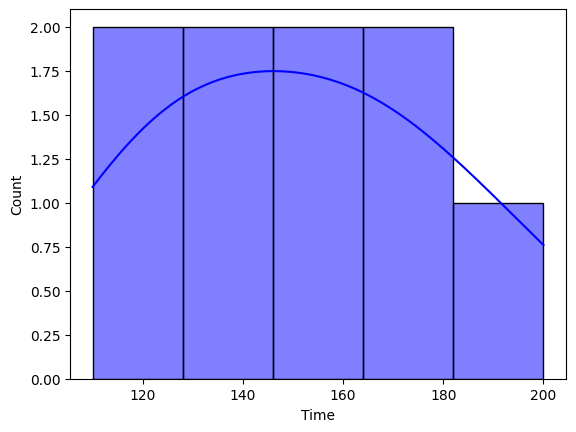

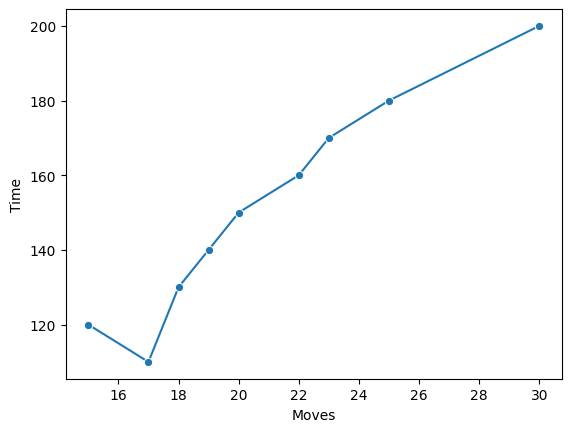

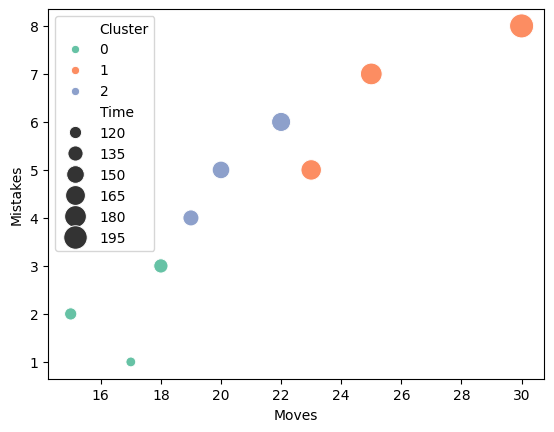

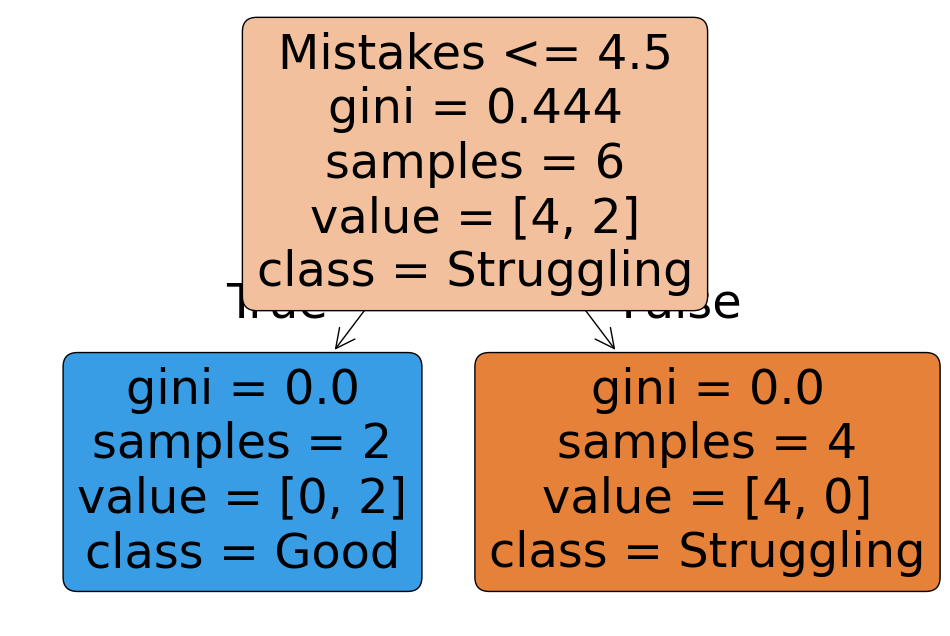

In [20]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

# بيانات اللاعبين (كما تم تعريفها مسبقًا)
data = {
    'Player': ['Player 1', 'Player 2', 'Player 3', 'Player 4', 'Player 5',
               'Player 6', 'Player 7', 'Player 8', 'Player 9'],
    'Moves': [20, 15, 25, 18, 22, 30, 19, 17, 23],
    'Mistakes': [5, 2, 7, 3, 6, 8, 4, 1, 5],
    'Time': [150, 120, 180, 130, 160, 200, 140, 110, 170]
}

# تحويل البيانات إلى DataFrame
df = pd.DataFrame(data)

# تعريف دالة لعرض التوصيات
def generate_recommendations(cluster):
    if cluster == 0:
        return "Consider adding hints for players in this cluster."
    elif cluster == 1:
        return "Players in this cluster are struggling; reduce the difficulty."
    else:
        return "Keep the current game design, players in this cluster are performing well."

# إعداد الواجهة
st.title("Game Analytics Dashboard")

# عرض البيانات
st.subheader("Player Data")
st.write(df)

# عرض الرسومات البيانية
st.subheader("Moves vs Mistakes vs Time")
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="Moves", y="Mistakes", hue="Time", palette="coolwarm", size="Time", sizes=(50, 300), ax=ax)
st.pyplot(fig)

# توزيع الوقت المستغرق
st.subheader("Distribution of Time Taken by Players")
fig, ax = plt.subplots()
sns.histplot(df['Time'], kde=True, color='blue', ax=ax)
st.pyplot(fig)

# رسم العلاقة بين الحركات والوقت
st.subheader("Moves vs Time")
fig, ax = plt.subplots()
sns.lineplot(x="Moves", y="Time", data=df, marker="o", ax=ax)
st.pyplot(fig)

# تطبيق K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Moves', 'Mistakes', 'Time']])

st.subheader("Player Clusters using K-Means")
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="Moves", y="Mistakes", hue="Cluster", palette="Set2", size="Time", sizes=(50, 300), ax=ax)
st.pyplot(fig)

# تطبيق Decision Tree
df['Label'] = (df['Mistakes'] < 5).astype(int)
X = df[['Moves', 'Mistakes', 'Time']]
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# تدريب نموذج Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# التنبؤ باستخدام البيانات الاختبارية
y_pred = model.predict(X_test)

# حساب الدقة
accuracy = accuracy_score(y_test, y_pred)
st.subheader(f"Decision Tree Model Accuracy: {accuracy * 100:.2f}%")

# عرض شجرة القرار
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=['Moves', 'Mistakes', 'Time'], class_names=['Struggling', 'Good'], rounded=True, ax=ax)
st.pyplot(fig)

# عرض التوصيات بناءً على التجميع
st.subheader("Recommendations for Players")
for i in range(len(df)):
    st.write(f"{df['Player'][i]}: {generate_recommendations(df['Cluster'][i])}")
